In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
colorcodes = ['#EF926C', '#7CC4A7', '#90A4CA', '#DA90C4', '#B2DB68', '#6363A7', '#F7CAC9',
              '#E2C799', '#84CBEB', '#DF6C67', '#878428', '#F9E053', '#6C3C17', '#C6C6C6', '#848484']
sns.set_palette(sns.color_palette(colorcodes))
sns.color_palette()


[(0.9372549019607843, 0.5725490196078431, 0.4235294117647059),
 (0.48627450980392156, 0.7686274509803922, 0.6549019607843137),
 (0.5647058823529412, 0.6431372549019608, 0.792156862745098),
 (0.8549019607843137, 0.5647058823529412, 0.7686274509803922),
 (0.6980392156862745, 0.8588235294117647, 0.40784313725490196),
 (0.38823529411764707, 0.38823529411764707, 0.6549019607843137),
 (0.9686274509803922, 0.792156862745098, 0.788235294117647),
 (0.8862745098039215, 0.7803921568627451, 0.6),
 (0.5176470588235295, 0.796078431372549, 0.9215686274509803),
 (0.8745098039215686, 0.4235294117647059, 0.403921568627451),
 (0.5294117647058824, 0.5176470588235295, 0.1568627450980392),
 (0.9764705882352941, 0.8784313725490196, 0.3254901960784314),
 (0.4235294117647059, 0.23529411764705882, 0.09019607843137255),
 (0.7764705882352941, 0.7764705882352941, 0.7764705882352941),
 (0.5176470588235295, 0.5176470588235295, 0.5176470588235295)]

In [3]:
df = pd.read_csv('data/Figure2A.Categorized.RPKM.csv', index_col='taxonomy')
df_abun = df.div(df.sum(axis=0),axis=1)
df_abun = df_abun[['PST', 'P1', 'P2', 'P3','P4', 'SST', 'S1', 'S2', 'S3', 'S4', 'S5']]
df_abun.sum(axis=1).sort_values(ascending=False)[:15]

taxonomy
other virus         3.513905
Siphoviridae        1.656676
Inoviridae          1.606443
Virgaviridae        0.978556
Myoviridae          0.762190
Mimiviridae         0.627472
Podoviridae         0.498596
Papillomaviridae    0.338009
Iridoviridae        0.173299
Retroviridae        0.128531
Herpesviridae       0.117352
Geminiviridae       0.102578
Phycodnaviridae     0.084962
Polydnaviridae      0.069836
Microviridae        0.065629
dtype: float64

In [4]:
## rearrange the order
top14 = ['Virgaviridae', 'Siphoviridae', 'Inoviridae', 'Podoviridae', 'Myoviridae', 'Microviridae', 'Polydnaviridae', 'Mimiviridae',
         'Papillomaviridae', 'Iridoviridae', 'Phycodnaviridae', 'Retroviridae', 'Herpesviridae', 'Geminiviridae', 'other virus']

In [5]:
df_abun_v1 = df_abun.loc[top14]
df_abun_v1.loc['Other viruses and viral families',:] = 1-df_abun_v1.iloc[:-1,:].sum(axis=0)
df_abun_v1.drop('other virus',inplace=True)
df_abun_v1.head()

,PST,P1,P2,P3,P4,SST,S1,S2,S3,S4,S5
taxonomy,,,,,,,,,,,
Virgaviridae,0.672282,0.000603,0.001480,0.032238,0.002311,0.241345,0.001417,0.001020,0.001384,0.023457,0.001019
Siphoviridae,0.012909,0.067541,0.038452,0.529627,0.055795,0.027235,0.200865,0.209614,0.153905,0.178541,0.182194
Inoviridae,0.000006,0.148580,0.438519,0.104276,0.271412,0.000004,0.088003,0.105455,0.212888,0.126035,0.111266
Podoviridae,0.014654,0.281122,0.000626,0.004495,0.001419,0.015749,0.037965,0.034445,0.012542,0.016908,0.078670
Myoviridae,0.021294,0.030934,0.031221,0.020258,0.016796,0.009441,0.160081,0.120073,0.148703,0.096499,0.106892


In [6]:
from matplotlib.ticker import PercentFormatter

font = {'family': 'arial',
        'weight': 'light',
        'size': 18}

plt.rc('font', **font)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.8

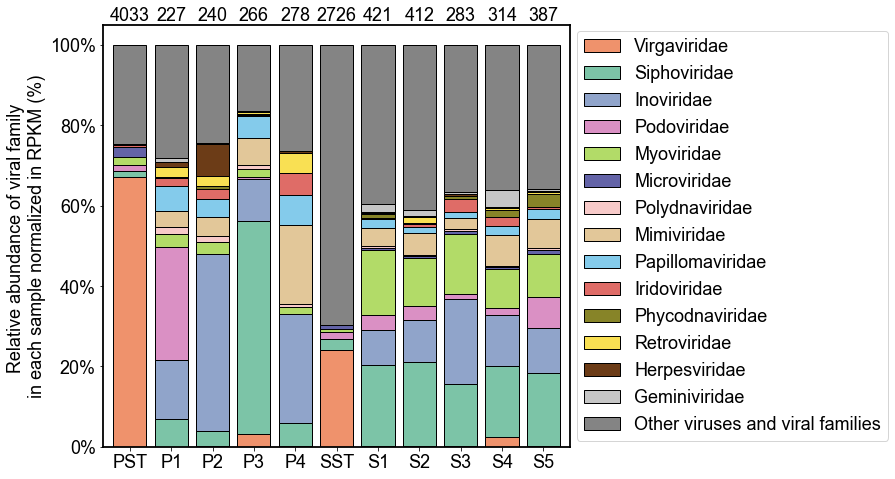

In [7]:
fig,ax = plt.subplots(figsize=(18,7))
df_abun_v1.T.plot(
    kind='bar', stacked=True, linewidth=1, width=0.8, ax=ax, edgecolor='black')
ax.legend(loc='right', bbox_to_anchor=(1.7, 0.5))
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylabel('Relative abundance of viral family \nin each sample normalized in RPKM (%)')

rects = ax.patches
# Make some labels.
labels = ['4033','227','240','266','278','2726','421','412','283','314','387']

for rect, label in zip(rects, labels):
    #height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,  1.05,label, ha="center", va="bottom")
#ax.tick_params(axis='both', labelsize=16, direction="in")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('plots/Figure2A.RPKM.abun.viralfamily.top14.pdf',dpi=300,bbox_inches='tight')
